<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OLS" data-toc-modified-id="OLS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OLS</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#LASSO" data-toc-modified-id="LASSO-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LASSO</a></span></li><li><span><a href="#OLS-with-different-resampling" data-toc-modified-id="OLS-with-different-resampling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>OLS with different resampling</a></span></li><li><span><a href="#compare-all-LASSO,-OLS,-Ridge" data-toc-modified-id="compare-all-LASSO,-OLS,-Ridge-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>compare all LASSO, OLS, Ridge</a></span></li><li><span><a href="#all-with-bootstrap" data-toc-modified-id="all-with-bootstrap-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>all with bootstrap</a></span></li><li><span><a href="#all-with-crossvalidation" data-toc-modified-id="all-with-crossvalidation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>all with crossvalidation</a></span></li><li><span><a href="#ridge-with-different-sampling" data-toc-modified-id="ridge-with-different-sampling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ridge with different sampling</a></span></li><li><span><a href="#lasso-with-different-resampling" data-toc-modified-id="lasso-with-different-resampling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>lasso with different resampling</a></span></li><li><span><a href="#OLS-with-SGD" data-toc-modified-id="OLS-with-SGD-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>OLS with SGD</a></span><ul class="toc-item"><li><span><a href="#Learn-rate" data-toc-modified-id="Learn-rate-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Learn rate</a></span></li></ul></li></ul></div>

In [10]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_linear_regression import plot_stat, plot_stat_sgd, apply_regression, apply_regression_sgd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data_linear_regression'):
    os.makedirs('data_linear_regression')
if not os.path.exists('data_linear_regression_sgd'):
    os.makedirs('data_linear_regression_sgd')
#note my bootstrap can be wrong. 

print("Number of processors: ", mp.cpu_count())

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of processors:  8


# OLS

In [210]:
#load ols data
method = "ols"
order = np.load("data_linear_regression/order.npy")
num_points = np.load("data_linear_regression/num_points.npy")
noise_var = np.load("data_linear_regression/noise_var.npy")
test_ratio = np.load("data_linear_regression/test_ratio.npy")
k_folds = np.load("data_linear_regression/k_folds.npy")
n_boots = np.load("data_linear_regression/n_boots.npy")
ridge_lambda = np.load("data_linear_regression/ridge_lambda.npy")
lasso_lambda = np.load("data_linear_regression/lasso_lambda.npy")
train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
test_var=np.load("data_linear_regression/test_variance"+method+".npy")

print(order)
print(num_points)
print(noise_var)
print(test_ratio)
print(k_folds)
print(n_boots)
print(ridge_lambda)
print(lasso_lambda)
print(test_MSE.shape)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[10 20 30]
[0.     0.0005 0.001  0.0015 0.002  0.0025]
[0.1 0.2 0.3 0.4]
[ 2  5 10]
[ 2  5 10]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]
(13, 3, 6, 4, 1, 1, 1, 1)


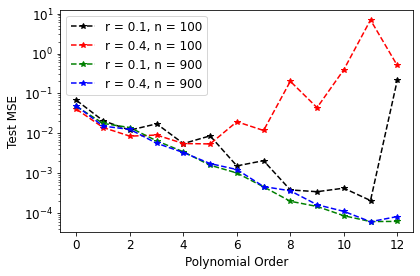

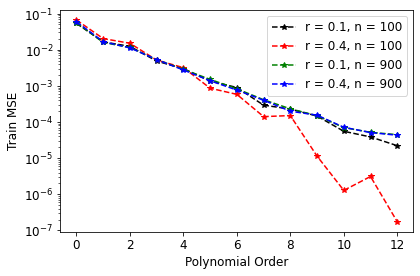

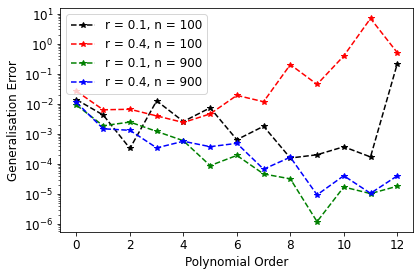

In [206]:
#

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 0, 0, 3, 0, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 3, 0, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 1, 0, 0, 0, 0, 0, 0], '--g', label = "r = 0.1, n = 400") #r=0.1, var = 0, n = 400
#ax.plot(order, test_MSE[:, 1, 0, 3, 0, 0, 0, 0], '--b', label = "r = 0.4, n = 400") #r=0.4, var = 0, n = 400

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols1.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 0, 0, 3, 0, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 3, 0, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols2.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, np.abs(train_MSE[:, 0, 0, 0, 0, 0, 0, 0]-test_MSE[:, 0, 0, 0, 0, 0, 0, 0]), '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 0, 0, 3, 0, 0, 0, 0]-test_MSE[:, 0, 0, 3, 0, 0, 0, 0]), '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 2, 0, 0, 0, 0, 0, 0]-test_MSE[:, 2, 0, 0, 0, 0, 0, 0]), '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, np.abs(train_MSE[:, 2, 0, 3, 0, 0, 0, 0]-test_MSE[:, 2, 0, 3, 0, 0, 0, 0]), '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Generalisation Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols3.png", dpi=200)

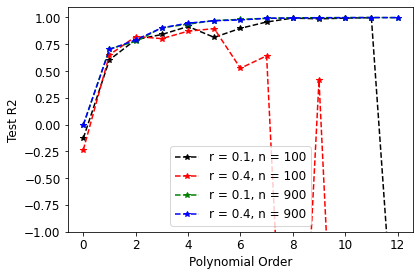

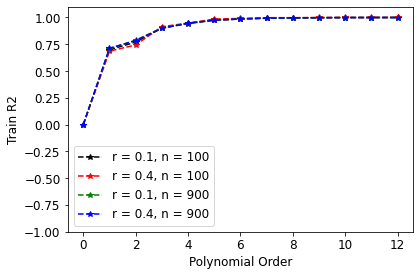

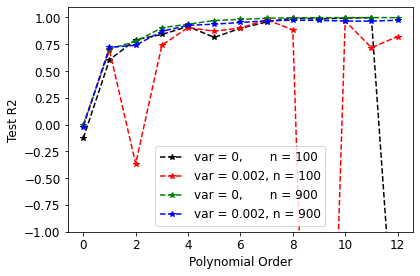

In [207]:
#

fig, ax = plt.subplots()
ax.plot(order, test_R2[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_R2[:, 0, 0, 3, 0, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_R2[:, 2, 0, 3, 0, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 1, 0, 0, 0, 0, 0, 0], '--g', label = "r = 0.1, n = 400") #r=0.1, var = 0, n = 400
#ax.plot(order, test_MSE[:, 1, 0, 3, 0, 0, 0, 0], '--b', label = "r = 0.4, n = 400") #r=0.4, var = 0, n = 400

#ax.set_yscale("log")
ax.set_ylabel("Test R2")
ax.set_ylim(bottom=-1.0, top = 1.1)
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols1b.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_R2[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, train_R2[:, 0, 0, 3, 0, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, train_R2[:, 2, 0, 3, 0, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


#ax.set_yscale("log")
ax.set_ylabel("Train R2")
ax.set_xlabel("Polynomial Order")
ax.legend()
ax.set_ylim(bottom=-1.0, top = 1.1)
plt.tight_layout()
plt.savefig("data/ols2b.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, test_R2[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "var = 0,       n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_R2[:, 0, 4, 0, 0, 0, 0, 0], '*--r', label = "var = 0.002, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "var = 0,       n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_R2[:, 2, 4, 0, 0, 0, 0, 0], '*--b', label = "var = 0.002, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 0, 2, 0, 0, 0, 0, 0], '.-r', label = "var = 0.001, n = 100") #r=0.4, var = 0, n = 100
#ax.plot(order, test_MSE[:, 2, 2, 0, 0, 0, 0, 0], '.-g', label = "var = 0.001, n = 900") #r=0.1, var = 0, n = 900

#ax.set_yscale("log")
ax.set_ylabel("Test R2")
ax.set_xlabel("Polynomial Order")
ax.legend()
ax.set_ylim(bottom=-1.0, top = 1.1)
plt.tight_layout()
plt.savefig("data/ols3b.png", dpi=200)

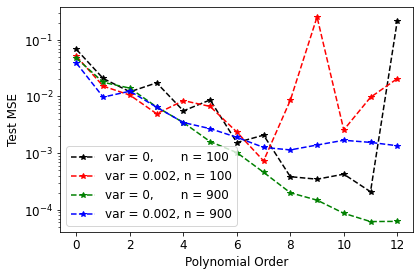

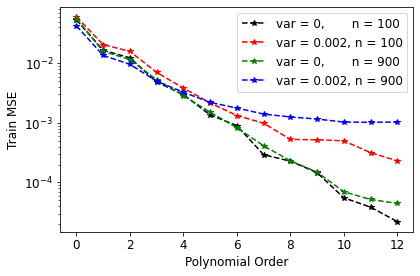

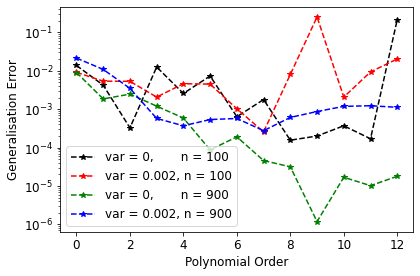

In [209]:
fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "var = 0,       n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 0, 4, 0, 0, 0, 0, 0], '*--r', label = "var = 0.002, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "var = 0,       n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 4, 0, 0, 0, 0, 0], '*--b', label = "var = 0.002, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 0, 2, 0, 0, 0, 0, 0], '.-r', label = "var = 0.001, n = 100") #r=0.4, var = 0, n = 100
#ax.plot(order, test_MSE[:, 2, 2, 0, 0, 0, 0, 0], '.-g', label = "var = 0.001, n = 900") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols4.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "var = 0,       n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 0, 4, 0, 0, 0, 0, 0], '*--r', label = "var = 0.002, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "var = 0,       n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 4, 0, 0, 0, 0, 0], '*--b', label = "var = 0.002, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols5.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, np.abs(train_MSE[:, 0, 0, 0, 0, 0, 0, 0]-test_MSE[:, 0, 0, 0, 0, 0, 0, 0]),
        '*--k', label = "var = 0,       n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 0, 4, 0, 0, 0, 0, 0]-test_MSE[:, 0, 4, 0, 0, 0, 0, 0]),
        '*--r', label = "var = 0.002, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 2, 0, 0, 0, 0, 0, 0]-test_MSE[:, 2, 0, 0, 0, 0, 0, 0]),
        '*--g', label = "var = 0,       n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, np.abs(train_MSE[:, 0, 4, 0, 0, 0, 0, 0]-test_MSE[:, 2, 4, 0, 0, 0, 0, 0]),
        '*--b', label = "var = 0.002, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Generalisation Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols6.png", dpi=200)

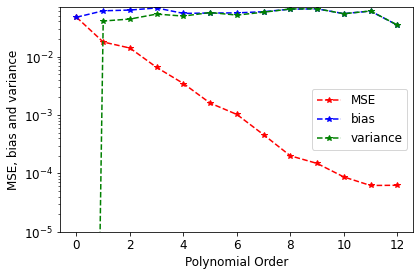

In [211]:
#bias and variance
fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--r', label = "MSE")
ax.plot(order, test_bias[:, 2, 0, 0, 0, 0, 0, 0], '*--b', label = "bias")
ax.plot(order, test_var[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "variance") #r=0.1, var = 0, n = 900
ax.set_ylim(bottom = 0.00001)
ax.set_yscale("log")
ax.set_ylabel("MSE, bias and variance")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols7.png", dpi=200)

# Ridge

In [13]:
#load data
method = "ridge"
order = np.load("data_linear_regression/order.npy")
num_points = np.load("data_linear_regression/num_points.npy")
noise_var = np.load("data_linear_regression/noise_var.npy")
test_ratio = np.load("data_linear_regression/test_ratio.npy")
k_folds = np.load("data_linear_regression/k_folds.npy")
n_boots = np.load("data_linear_regression/n_boots.npy")
ridge_lambda = np.load("data_linear_regression/ridge_lambda.npy")
lasso_lambda = np.load("data_linear_regression/lasso_lambda.npy")
train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
test_var=np.load("data_linear_regression/test_variance"+method+".npy")

print(order)
print(num_points)
print(noise_var)
print(test_ratio)
print(k_folds)
print(n_boots)
print(ridge_lambda)
print(lasso_lambda)
print(test_MSE.shape)


method = "ols"
otrain_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
otest_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
otrain_R2=np.load("data_linear_regression/train_R2"+method+".npy")
otest_R2=np.load("data_linear_regression/test_R2"+method+".npy")
otest_bias=np.load("data_linear_regression/test_bias"+method+".npy")
otest_var=np.load("data_linear_regression/test_variance"+method+".npy")


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[10 20 30]
[0.     0.0005 0.001  0.0015 0.002  0.0025]
[0.1 0.2 0.3 0.4]
[ 2  5 10]
[ 2  5 10]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]
(13, 3, 6, 4, 5, 1, 1, 1)


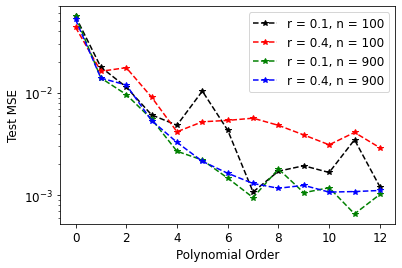

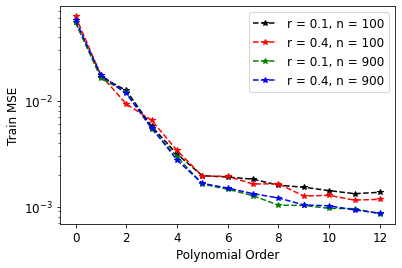

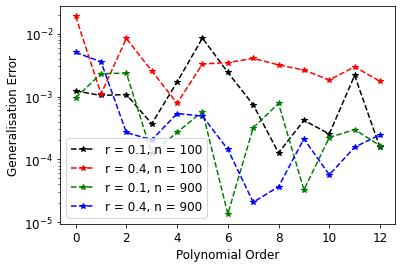

In [214]:
#
lambda_idx = 0
fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, lambda_idx, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 0, 0, 3, lambda_idx, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, lambda_idx, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 3, lambda_idx, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 1, 0, 0, 0, 0, 0, 0], '--g', label = "r = 0.1, n = 400") #r=0.1, var = 0, n = 400
#ax.plot(order, test_MSE[:, 1, 0, 3, 0, 0, 0, 0], '--b', label = "r = 0.4, n = 400") #r=0.4, var = 0, n = 400

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/ridge1.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, lambda_idx, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 0, 0, 3, lambda_idx, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, lambda_idx, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 3, lambda_idx, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/ridge2.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, np.abs(train_MSE[:, 0, 0, 0, lambda_idx, 0, 0, 0]-test_MSE[:, 0, 0, 0, 0, 0, 0, 0]), '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 0, 0, 3, lambda_idx, 0, 0, 0]-test_MSE[:, 0, 0, 3, 0, 0, 0, 0]), '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 2, 0, 0, lambda_idx, 0, 0, 0]-test_MSE[:, 2, 0, 0, 0, 0, 0, 0]), '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, np.abs(train_MSE[:, 2, 0, 3, lambda_idx, 0, 0, 0]-test_MSE[:, 2, 0, 3, 0, 0, 0, 0]), '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Generalisation Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/ridge3.png", dpi=200)

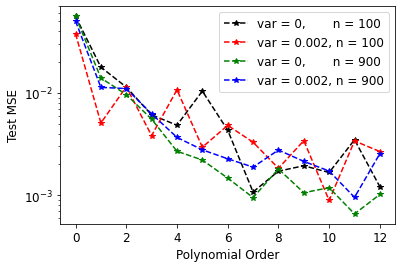

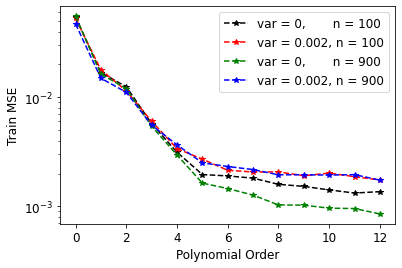

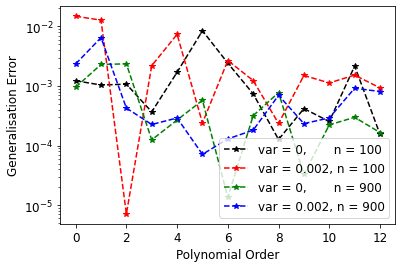

In [216]:
fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, lambda_idx, 0, 0, 0], '*--k', label = "var = 0,       n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 0, 4, 0, lambda_idx, 0, 0, 0], '*--r', label = "var = 0.002, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, lambda_idx, 0, 0, 0], '*--g', label = "var = 0,       n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 4, 0, lambda_idx, 0, 0, 0], '*--b', label = "var = 0.002, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 0, 2, 0, 0, 0, 0, 0], '.-r', label = "var = 0.001, n = 100") #r=0.4, var = 0, n = 100
#ax.plot(order, test_MSE[:, 2, 2, 0, 0, 0, 0, 0], '.-g', label = "var = 0.001, n = 900") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/ridge4.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, lambda_idx, 0, 0, 0], '*--k', label = "var = 0,       n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 0, 4, 0, lambda_idx, 0, 0, 0], '*--r', label = "var = 0.002, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, lambda_idx, 0, 0, 0], '*--g', label = "var = 0,       n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 4, 0, lambda_idx, 0, 0, 0], '*--b', label = "var = 0.002, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/ridge5.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, np.abs(train_MSE[:, 0, 0, 0, lambda_idx, 0, 0, 0]-test_MSE[:, 0, 0, 0, 0, 0, 0, 0]),
        '*--k', label = "var = 0,       n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 0, 4, 0, lambda_idx, 0, 0, 0]-test_MSE[:, 0, 4, 0, 0, 0, 0, 0]),
        '*--r', label = "var = 0.002, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 2, 0, 0, lambda_idx, 0, 0, 0]-test_MSE[:, 2, 0, 0, 0, 0, 0, 0]),
        '*--g', label = "var = 0,       n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, np.abs(train_MSE[:, 0, 4, 0, lambda_idx, 0, 0, 0]-test_MSE[:, 2, 4, 0, 0, 0, 0, 0]),
        '*--b', label = "var = 0.002, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Generalisation Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/ridge6.png", dpi=200)

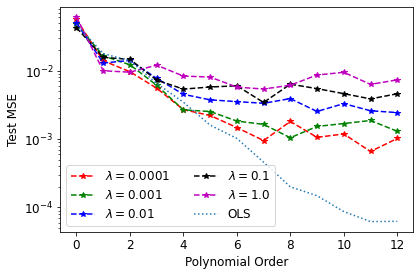

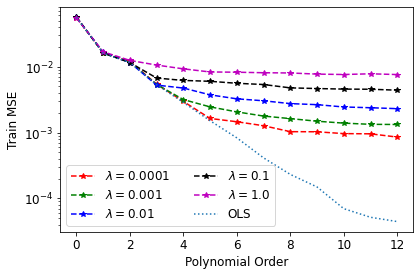

In [14]:
fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--r', label = r"$\lambda = $" + str(ridge_lambda[0]))
ax.plot(order, test_MSE[:, 2, 0, 0, 1, 0, 0, 0], '*--g', label = r"$\lambda = $" + str(ridge_lambda[1]))
ax.plot(order, test_MSE[:, 2, 0, 0, 2, 0, 0, 0], '*--b', label = r"$\lambda = $" + str(ridge_lambda[2]))
ax.plot(order, test_MSE[:, 2, 0, 0, 3, 0, 0, 0], '*--k', label = r"$\lambda = $" + str(ridge_lambda[3]))
ax.plot(order, test_MSE[:, 2, 0, 0, 4, 0, 0, 0], '*--m', label = r"$\lambda = $" + str(ridge_lambda[4]))
ax.plot(order, otest_MSE[:, 2, 0, 0, 0, 0, 0, 0], linestyle="dotted", label = "OLS")
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend(loc="best", ncol=2)
plt.tight_layout()
plt.savefig("data/ridge7.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--r', label = r"$\lambda = $" + str(ridge_lambda[0]))
ax.plot(order, train_MSE[:, 2, 0, 0, 1, 0, 0, 0], '*--g', label = r"$\lambda = $" + str(ridge_lambda[1]))
ax.plot(order, train_MSE[:, 2, 0, 0, 2, 0, 0, 0], '*--b', label = r"$\lambda = $" + str(ridge_lambda[2]))
ax.plot(order, train_MSE[:, 2, 0, 0, 3, 0, 0, 0], '*--k', label = r"$\lambda = $" + str(ridge_lambda[3]))
ax.plot(order, train_MSE[:, 2, 0, 0, 4, 0, 0, 0], '*--m', label = r"$\lambda = $" + str(ridge_lambda[4]))
ax.plot(order, otrain_MSE[:, 2, 0, 0, 0, 0, 0, 0], linestyle="dotted", label = "OLS")
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend(loc="best", ncol=2)
plt.tight_layout()
plt.savefig("data/ridge7b.png", dpi=200)

# LASSO

In [17]:
#load data
method = "lasso"
order = np.load("data_linear_regression/order.npy")
num_points = np.load("data_linear_regression/num_points.npy")
noise_var = np.load("data_linear_regression/noise_var.npy")
test_ratio = np.load("data_linear_regression/test_ratio.npy")
k_folds = np.load("data_linear_regression/k_folds.npy")
n_boots = np.load("data_linear_regression/n_boots.npy")
ridge_lambda = np.load("data_linear_regression/ridge_lambda.npy")
lasso_lambda = np.load("data_linear_regression/lasso_lambda.npy")
train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
test_var=np.load("data_linear_regression/test_variance"+method+".npy")

print(order)
print(num_points)
print(noise_var)
print(test_ratio)
print(k_folds)
print(n_boots)
print(ridge_lambda)
print(lasso_lambda)
print(test_MSE.shape)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[10 20 30]
[0.     0.0005 0.001  0.0015 0.002  0.0025]
[0.1 0.2 0.3 0.4]
[ 2  5 10]
[ 2  5 10]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]
(13, 3, 6, 4, 1, 5, 1, 1)


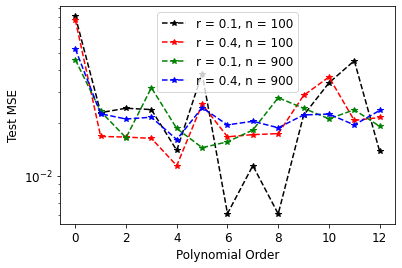

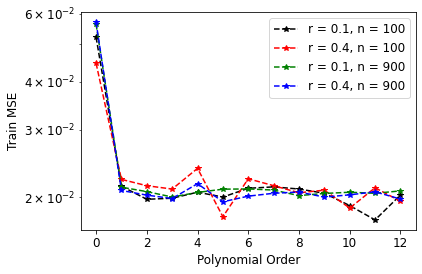

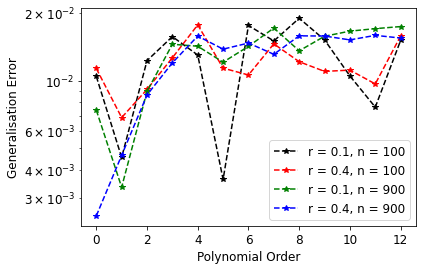

In [221]:
#
lambda_idx = 4
fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, 0, lambda_idx, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 0, 0, 3, 0, lambda_idx, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, lambda_idx, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 3, 0, lambda_idx, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 1, 0, 0, 0, 0, 0, 0], '--g', label = "r = 0.1, n = 400") #r=0.1, var = 0, n = 400
#ax.plot(order, test_MSE[:, 1, 0, 3, 0, 0, 0, 0], '--b', label = "r = 0.4, n = 400") #r=0.4, var = 0, n = 400

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/lasso1.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, 0, lambda_idx, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 0, 0, 3, 0, lambda_idx, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, lambda_idx, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 3, 0, lambda_idx, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/lasso2.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, np.abs(train_MSE[:, 0, 0, 0, 0, lambda_idx, 0, 0]-test_MSE[:, 0, 0, 0, 0, 0, 0, 0]), '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 0, 0, 3, 0, lambda_idx, 0, 0]-test_MSE[:, 0, 0, 3, 0, 0, 0, 0]), '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 2, 0, 0, 0, lambda_idx, 0, 0]-test_MSE[:, 2, 0, 0, 0, 0, 0, 0]), '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, np.abs(train_MSE[:, 2, 0, 3, 0, lambda_idx, 0, 0]-test_MSE[:, 2, 0, 3, 0, 0, 0, 0]), '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Generalisation Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/lasso3.png", dpi=200)

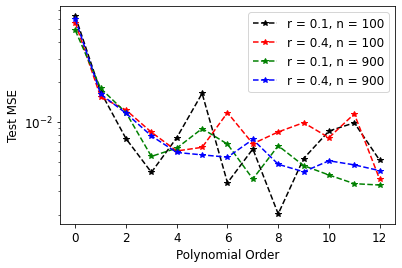

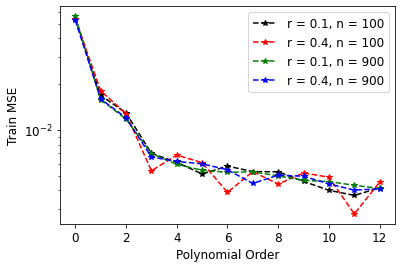

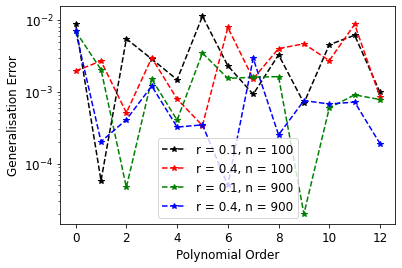

In [223]:
#

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 0, 0, 3, 0, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 3, 0, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900
#ax.plot(order, test_MSE[:, 1, 0, 0, 0, 0, 0, 0], '--g', label = "r = 0.1, n = 400") #r=0.1, var = 0, n = 400
#ax.plot(order, test_MSE[:, 1, 0, 3, 0, 0, 0, 0], '--b', label = "r = 0.4, n = 400") #r=0.4, var = 0, n = 400

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/lasso4.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 0, 0, 3, 0, 0, 0, 0], '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 3, 0, 0, 0, 0], '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/lasso5.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, np.abs(train_MSE[:, 0, 0, 0, 0, 0, 0, 0]-test_MSE[:, 0, 0, 0, 0, 0, 0, 0]), '*--k', label = "r = 0.1, n = 100") #r=0.1, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 0, 0, 3, 0, 0, 0, 0]-test_MSE[:, 0, 0, 3, 0, 0, 0, 0]), '*--r', label = "r = 0.4, n = 100") #r=0.4, var = 0, n = 100
ax.plot(order, np.abs(train_MSE[:, 2, 0, 0, 0, 0, 0, 0]-test_MSE[:, 2, 0, 0, 0, 0, 0, 0]), '*--g', label = "r = 0.1, n = 900") #r=0.1, var = 0, n = 900
ax.plot(order, np.abs(train_MSE[:, 2, 0, 3, 0, 0, 0, 0]-test_MSE[:, 2, 0, 3, 0, 0, 0, 0]), '*--b', label = "r = 0.4, n = 900") #r=0.4, var = 0, n = 900


ax.set_yscale("log")
ax.set_ylabel("Generalisation Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/lasso6.png", dpi=200)

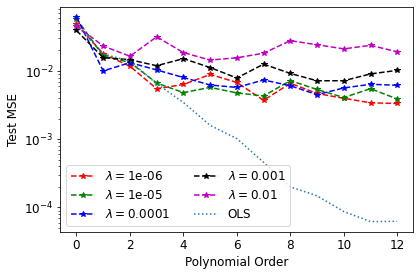

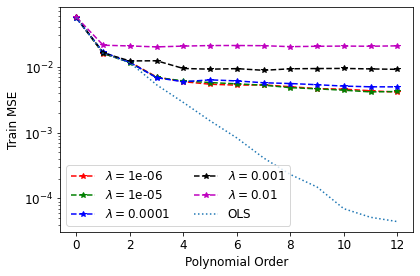

In [18]:
lambda_idx = 4
fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--r', label = r"$\lambda = $" + str(lasso_lambda[0]))
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 1, 0, 0], '*--g', label = r"$\lambda = $" + str(lasso_lambda[1]))
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 2, 0, 0], '*--b', label = r"$\lambda = $" + str(lasso_lambda[2]))
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 3, 0, 0], '*--k', label = r"$\lambda = $" + str(lasso_lambda[3]))
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 4, 0, 0], '*--m', label = r"$\lambda = $" + str(lasso_lambda[4]))
ax.plot(order, otest_MSE[:, 2, 0, 0, 0, 0, 0, 0], linestyle="dotted", label = "OLS")
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend(loc="best", ncol=2)
plt.tight_layout()
plt.savefig("data/lasso7.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--r', label = r"$\lambda = $" + str(lasso_lambda[0]))
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 1, 0, 0], '*--g', label = r"$\lambda = $" + str(lasso_lambda[1]))
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 2, 0, 0], '*--b', label = r"$\lambda = $" + str(lasso_lambda[2]))
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 3, 0, 0], '*--k', label = r"$\lambda = $" + str(lasso_lambda[3]))
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 4, 0, 0], '*--m', label = r"$\lambda = $" + str(lasso_lambda[4]))
ax.plot(order, otrain_MSE[:, 2, 0, 0, 0, 0, 0, 0], linestyle="dotted", label = "OLS")
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend(loc="best", ncol=2)
plt.tight_layout()
plt.savefig("data/lasso7b.png", dpi=200)

# OLS with different resampling

In [8]:
#load data
method = "ols"

ols_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
ols_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
ols_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
ols_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
ols_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
ols_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "ols_bootstrap"

olsbt_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
olsbt_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
olsbt_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
olsbt_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
olsbt_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
olsbt_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "ols_crossvalidation"

olscv_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
olscv_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
olscv_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
olscv_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
olscv_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
olscv_test_var=np.load("data_linear_regression/test_variance"+method+".npy")


The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


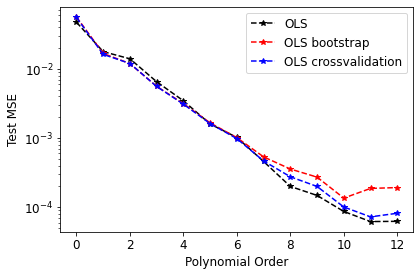

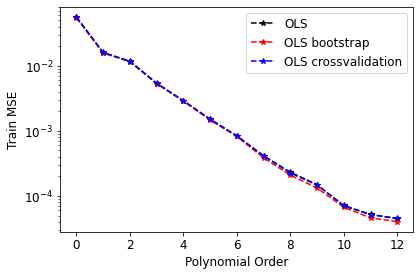

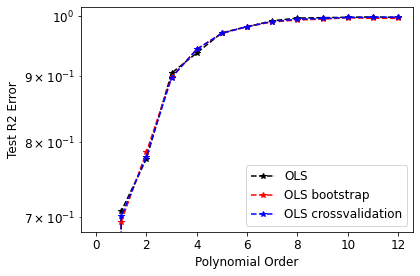

In [22]:
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, ols_test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_test_MSE[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_test_MSE[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols8.png", dpi=200)

# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, ols_train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_train_MSE[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_train_MSE[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols9.png", dpi=200)

print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, ols_test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_test_R2[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_test_R2[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols10.png", dpi=200)

The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


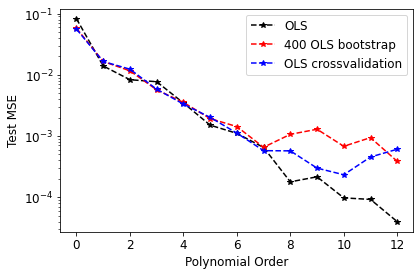

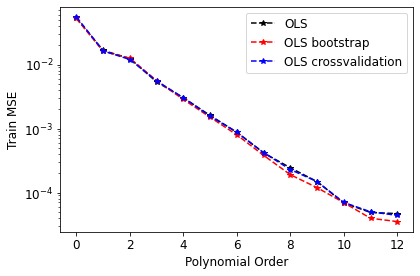

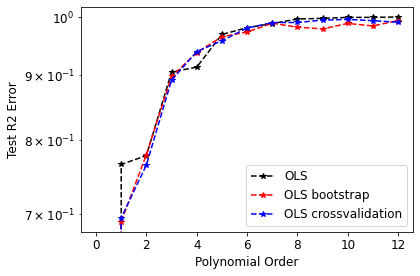

In [24]:
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, ols_test_MSE[:, 1, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_test_MSE[:, 1, 0, 0, 0, 0, -1, 0], '*--r', label = "400 OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_test_MSE[:, 1, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols11.png", dpi=200)
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, ols_train_MSE[:, 1, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_train_MSE[:, 1, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_train_MSE[:, 1, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols12.png", dpi=200)
print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, ols_test_R2[:, 1, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_test_R2[:, 1, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_test_R2[:, 1, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols13.png", dpi=200)

The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


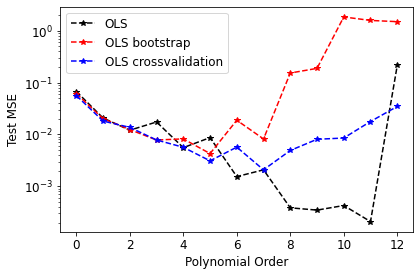

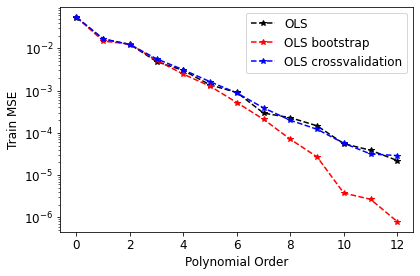

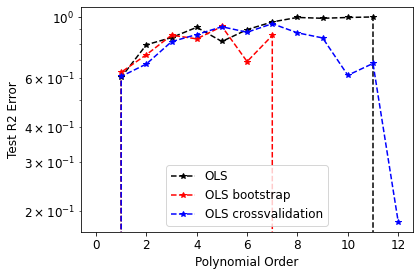

In [9]:
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, ols_test_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_test_MSE[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_test_MSE[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols14.png", dpi=200)
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, ols_train_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_train_MSE[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_train_MSE[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols15.png", dpi=200)

print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, ols_test_R2[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, olsbt_test_R2[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "OLS bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, olscv_test_R2[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "OLS crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ols16.png", dpi=200)

# compare all LASSO, OLS, Ridge

In [233]:
#load data
method = "ols"

ols_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
ols_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
ols_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
ols_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
ols_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
ols_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "ridge"

ridge_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
ridge_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
ridge_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
ridge_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
ridge_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
ridge_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "lasso"

lasso_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
lasso_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
lasso_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
lasso_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
lasso_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
lasso_test_var=np.load("data_linear_regression/test_variance"+method+".npy")


The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


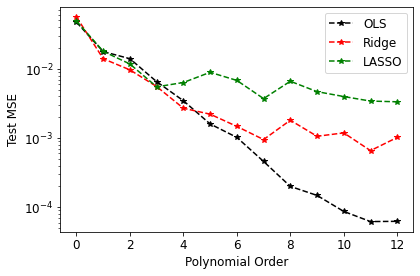

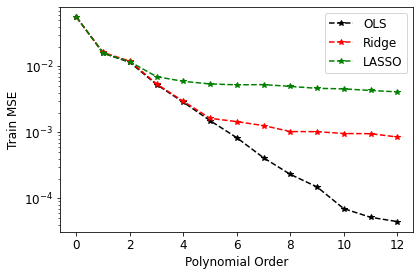

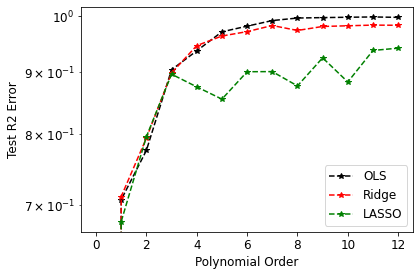

In [234]:
# taking the best available comparisons of each model
ridge_lambda_idx = 0
lasso_lambda_idx = 0
fig, ax = plt.subplots()
ax.plot(order, ols_test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_test_MSE[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_test_MSE[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/orl1.png", dpi=200)
# taking the best available comparisons of each model

ridge_lambda_idx = 0
lasso_lambda_idx = 0
fig, ax = plt.subplots()
ax.plot(order, ols_train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_train_MSE[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_train_MSE[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/orl2.png", dpi=200)
print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, ols_test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_test_R2[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_test_R2[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend(loc = "lower right")
plt.tight_layout()
plt.savefig("data/orl3.png", dpi=200)

# all with bootstrap

In [236]:
#load data
method = "ols_bootstrap"

ols_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
ols_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
ols_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
ols_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
ols_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
ols_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "ridge_bootstrap"

ridge_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
ridge_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
ridge_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
ridge_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
ridge_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
ridge_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "lasso_bootstrap"

lasso_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
lasso_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
lasso_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
lasso_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
lasso_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
lasso_test_var=np.load("data_linear_regression/test_variance"+method+".npy")


The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


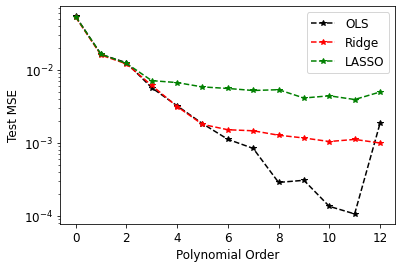

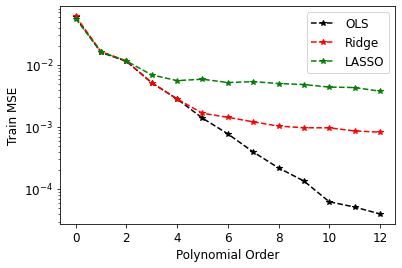

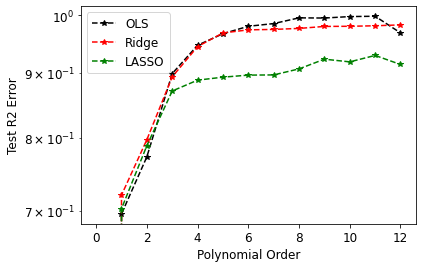

In [237]:
# taking the best available comparisons of each model
ridge_lambda_idx = 0
lasso_lambda_idx = 0
fig, ax = plt.subplots()
ax.plot(order, ols_test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_test_MSE[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_test_MSE[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/orl4.png", dpi=200)
# taking the best available comparisons of each model

ridge_lambda_idx = 0
lasso_lambda_idx = 0
fig, ax = plt.subplots()
ax.plot(order, ols_train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_train_MSE[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_train_MSE[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/orl5.png", dpi=200)
print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, ols_test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_test_R2[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_test_R2[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/orl6.png", dpi=200)

# all with crossvalidation

In [239]:
#load data
method = "ols_crossvalidation"

ols_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
ols_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
ols_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
ols_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
ols_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
ols_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "ridge_crossvalidation"

ridge_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
ridge_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
ridge_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
ridge_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
ridge_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
ridge_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "lasso_crossvalidation"

lasso_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
lasso_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
lasso_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
lasso_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
lasso_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
lasso_test_var=np.load("data_linear_regression/test_variance"+method+".npy")


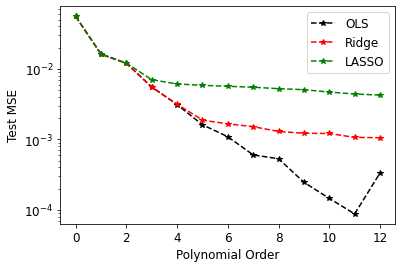

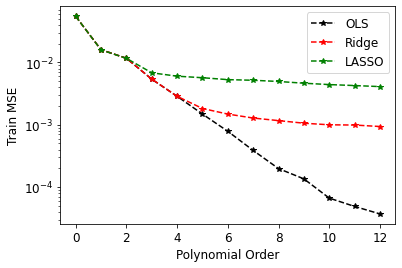

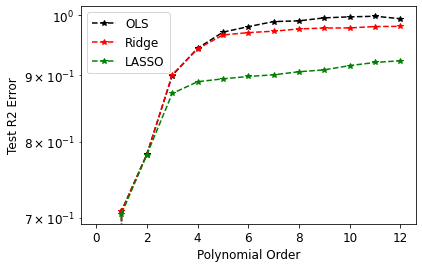

In [240]:
# taking the best available comparisons of each model
ridge_lambda_idx = 0
lasso_lambda_idx = 0
fig, ax = plt.subplots()
ax.plot(order, ols_test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_test_MSE[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_test_MSE[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/orl7.png", dpi=200)
# taking the best available comparisons of each model

ridge_lambda_idx = 0
lasso_lambda_idx = 0
fig, ax = plt.subplots()
ax.plot(order, ols_train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_train_MSE[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_train_MSE[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/orl8.png", dpi=200)
fig, ax = plt.subplots()
ax.plot(order, ols_test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "OLS") #r=0.1, var = 0, n = 900
ax.plot(order, ridge_test_R2[:, 2, 0, 0, ridge_lambda_idx, 0, 0, 0], '*--r', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, lasso_test_R2[:, 2, 0, 0, 0, lasso_lambda_idx, 0, 0], '*--g', label = "LASSO") #r=0.1, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.savefig("data/orl9.png", dpi=200)

# ridge with different sampling

In [244]:
#load data
method = "ridge"

train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "ridge_bootstrap"

bt_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
bt_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
bt_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
bt_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
bt_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
bt_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "ridge_crossvalidation"

cv_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
cv_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
cv_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
cv_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
cv_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
cv_test_var=np.load("data_linear_regression/test_variance"+method+".npy")


The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


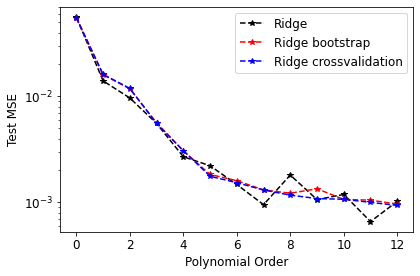

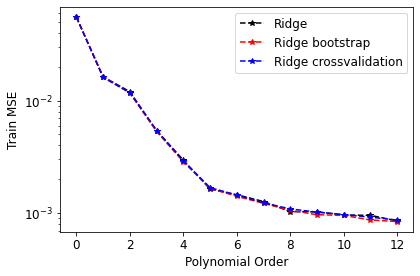

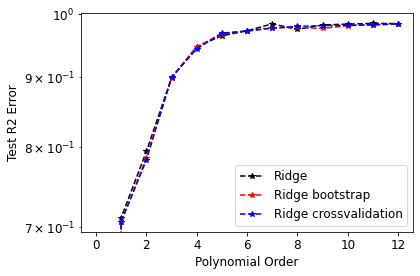

In [243]:
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_MSE[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "Ridge bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_MSE[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "Ridge crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ridge8.png", dpi=200)
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, bt_train_MSE[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "Ridge bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_train_MSE[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "Ridge crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ridge9.png", dpi=200)
print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_R2[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "Ridge bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_R2[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "Ridge crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ridge10.png", dpi=200)

The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


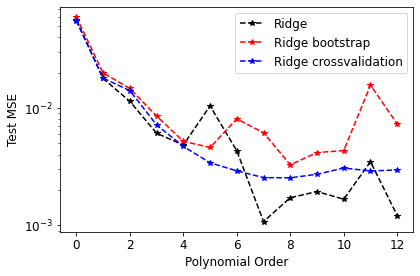

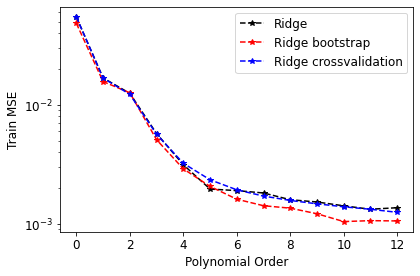

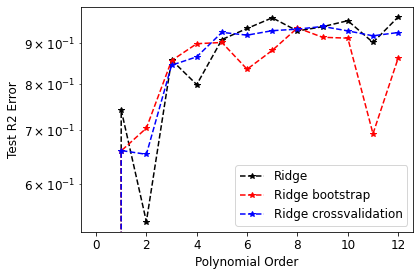

In [245]:
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_MSE[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "Ridge bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_MSE[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "Ridge crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ridge11.png", dpi=200)
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, bt_train_MSE[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "Ridge bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_train_MSE[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "Ridge crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ridge12.png", dpi=200)
print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, test_R2[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "Ridge") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_R2[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "Ridge bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_R2[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "Ridge crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/ridge13.png", dpi=200)

# lasso with different resampling

In [253]:
#load data
method = "lasso"

train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "lasso_bootstrap"

bt_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
bt_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
bt_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
bt_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
bt_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
bt_test_var=np.load("data_linear_regression/test_variance"+method+".npy")

method = "lasso_crossvalidation"

cv_train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
cv_test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
cv_train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
cv_test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
cv_test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
cv_test_var=np.load("data_linear_regression/test_variance"+method+".npy")


The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


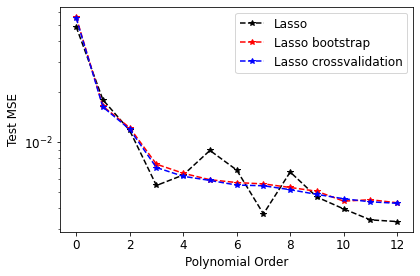

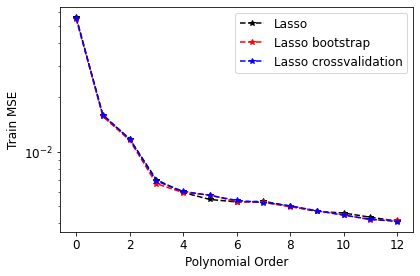

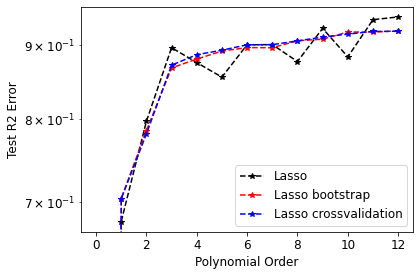

In [248]:
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "Lasso") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_MSE[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "Lasso bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_MSE[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "Lasso crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/lasso8.png", dpi=200)
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "Lasso") #r=0.1, var = 0, n = 900
ax.plot(order, bt_train_MSE[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "Lasso bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_train_MSE[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "Lasso crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/lasso9.png", dpi=200)
print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, test_R2[:, 2, 0, 0, 0, 0, 0, 0], '*--k', label = "Lasso") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_R2[:, 2, 0, 0, 0, 0, -1, 0], '*--r', label = "Lasso bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_R2[:, 2, 0, 0, 0, 0, 0, -1], '*--b', label = "Lasso crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test R2 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/lasso10.png", dpi=200)

The results indicate that the training in ridge and lasso hasn't been as good as OLS.
This in turn affects the test MSE
Lambda also affects the training


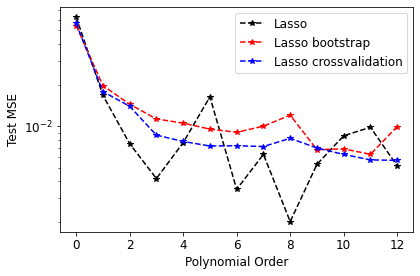

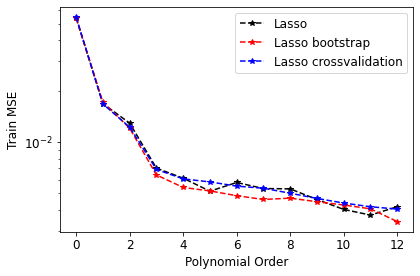

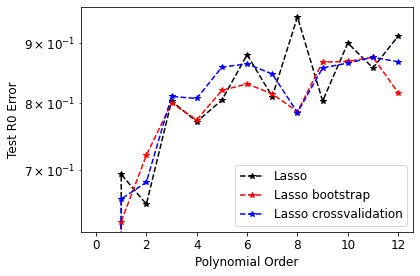

In [254]:
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "Lasso") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_MSE[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "Lasso bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_MSE[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "Lasso crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/lasso11.png", dpi=200)
# taking the best available comparisons of each model

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "Lasso") #r=0.1, var = 0, n = 900
ax.plot(order, bt_train_MSE[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "Lasso bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_train_MSE[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "Lasso crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/lasso12.png", dpi=200)
print("The results indicate that the training in ridge and lasso hasn't been as good as OLS.")
print("This in turn affects the test MSE")
print("Lambda also affects the training")

fig, ax = plt.subplots()
ax.plot(order, test_R2[:, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "Lasso") #r=0.1, var = 0, n = 900
ax.plot(order, bt_test_R2[:, 0, 0, 0, 0, 0, -1, 0], '*--r', label = "Lasso bootstrap") #r=0.1, var = 0, n = 900
ax.plot(order, cv_test_R2[:, 0, 0, 0, 0, 0, 0, -1], '*--b', label = "Lasso crossvalidation") #r=0.1, var = 0, n = 900
ax.set_yscale("log")
ax.set_ylabel("Test R0 Error")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/lasso13.png", dpi=200)

# OLS with SGD

In [2]:
#load ols data
method = "ols_sgd"
order = np.load("data_linear_regression_sgd/order.npy")
num_points = np.load("data_linear_regression_sgd/num_points.npy")
noise_var = np.load("data_linear_regression_sgd/noise_var.npy")
test_ratio = np.load("data_linear_regression_sgd/test_ratio.npy")
k_folds = np.load("data_linear_regression_sgd/k_folds.npy")
n_boots = np.load("data_linear_regression_sgd/n_boots.npy")
ridge_lambda = np.load("data_linear_regression_sgd/ridge_lambda.npy")
lasso_lambda = np.load("data_linear_regression_sgd/lasso_lambda.npy")
learn_rates= np.load("data_linear_regression_sgd/learn_rates.npy")
num_min_batches= np.load("data_linear_regression_sgd/num_min_batches.npy")
epochs = np.load("data_linear_regression_sgd/epochs.npy")

train_MSE=np.load("data_linear_regression_sgd/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression_sgd/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression_sgd/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression_sgd/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression_sgd/test_bias"+method+".npy")
test_var=np.load("data_linear_regression_sgd/test_variance"+method+".npy")

print(order)
print(num_points)
print(noise_var)
print(test_ratio)
print(k_folds)
print(n_boots)
print(ridge_lambda)
print(lasso_lambda)
print(learn_rates)
print(num_min_batches)
print(epochs)
print(test_MSE.shape)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[10 20 30]
[0.     0.0005 0.001 ]
[0.1 0.2 0.3]
[10]
[10]
[0.001 0.01  0.1  ]
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]
[0.001 0.01  0.1   1.   ]
[ 1  2  5 10 32]
[  10  100  500 1000]
(13, 3, 3, 3, 1, 1, 1, 1, 4, 5, 4)


## Learn rate

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


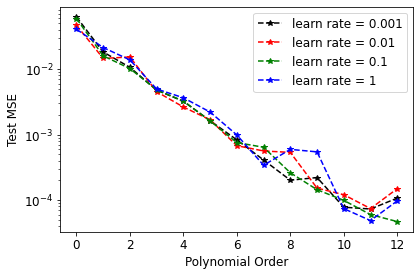

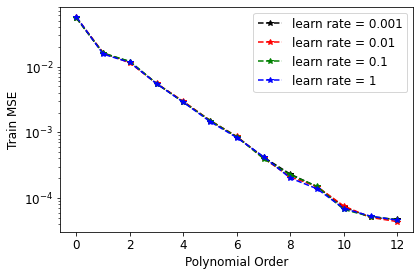

In [3]:
#

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 0], '*--k', label = "learn rate = 0.001") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 1, -1, 0], '*--r', label = "learn rate = 0.01") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 2, -1, 0], '*--g', label = "learn rate = 0.1") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 3, -1, 0], '*--b', label = "learn rate = 1") #r=0.4, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/olssgd1.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 0], '*--k', label = "learn rate = 0.001") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 1, -1, 0], '*--r', label = "learn rate = 0.01") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 2, -1, 0], '*--g', label = "learn rate = 0.1") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 3, -1, 0], '*--b', label = "learn rate = 1") #r=0.4, var = 0, n = 900



ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/olssgd2.png", dpi=200)

In [4]:
## num min batches

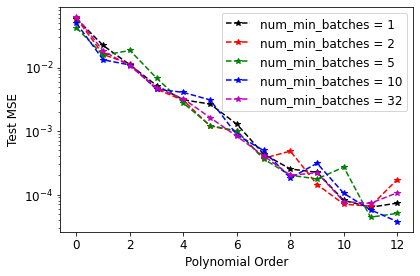

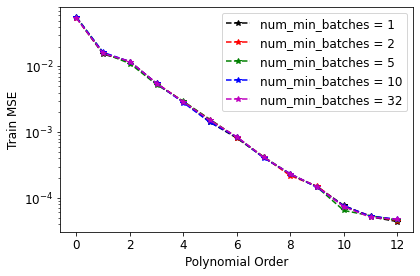

In [5]:
#

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "num_min_batches = 1") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0], '*--r', label = "num_min_batches = 2") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0], '*--g', label = "num_min_batches = 5") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0], '*--b', label = "num_min_batches = 10") #r=0.4, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0], '*--m', label = "num_min_batches = 32")

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/olssgd3.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], '*--k', label = "num_min_batches = 1") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0], '*--r', label = "num_min_batches = 2") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0], '*--g', label = "num_min_batches = 5") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0], '*--b', label = "num_min_batches = 10") #r=0.4, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0], '*--m', label = "num_min_batches = 32")


ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/olssgd4.png", dpi=200)

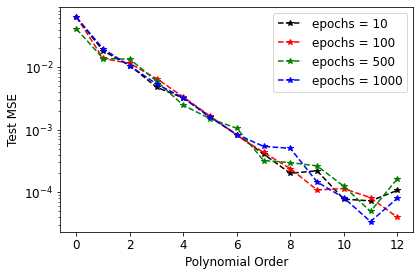

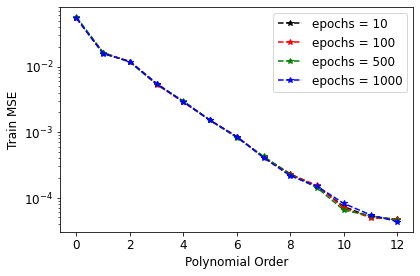

In [6]:
#

fig, ax = plt.subplots()
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 0], '*--k', label = "epochs = 10") #r=0.1, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 1], '*--r', label = "epochs = 100") #r=0.4, var = 0, n = 100
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 2], '*--g', label = "epochs = 500") #r=0.1, var = 0, n = 900
ax.plot(order, test_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 3], '*--b', label = "epochs = 1000") #r=0.4, var = 0, n = 900

ax.set_yscale("log")
ax.set_ylabel("Test MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/olssgd5.png", dpi=200)

fig, ax = plt.subplots()
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 0], '*--k', label = "epochs = 10") #r=0.1, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 1], '*--r', label = "epochs = 100") #r=0.4, var = 0, n = 100
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 2], '*--g', label = "epochs = 500") #r=0.1, var = 0, n = 900
ax.plot(order, train_MSE[:, 2, 0, 0, 0, 0, 0, 0, 0, -1, 3], '*--b', label = "epochs = 1000") #r=0.4, var = 0, n = 900



ax.set_yscale("log")
ax.set_ylabel("Train MSE")
ax.set_xlabel("Polynomial Order")
ax.legend()
plt.tight_layout()
plt.savefig("data/olssgd6.png", dpi=200)